# Apresentação, introdução, iniciação ao problema...

---

Esse é um famoso banco de dados que provém de uma competição do [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Ele está disponível neste [link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) e tem a seguinte descrição

**Comece aqui se**:

1. Você tem experiência com R ou Python; e
2. Conhece um pouco sobre aprendizado de máquina;

Ideal para uma pessoa que está aprendendo análise de dados em Python (em R eu já estou em um nível relativamente intermediário) e também aprendizado de máquina (igual eu, neste momento). 

## Descrição da competição 

---

Esse é um banco de dados *playground*, justamente para aplicarmos tudo aquilo que aprendemos em análise de dados e previsão. Também menciona a parte que muitas coisas, como o número de banheiros, influencia no valor de uma casa.

O banco de dados possui 79 variáveis explicativas, estas referem aos aspectos residenciais de casas da cidade de Ames em Iowa.

## Objetivo

---

A partir destas 79 variáveis explicativas, isto é, as características das casas, prever o valor de casa. 

## Habilidades que serão praticadas (segundo o Kaggle)

---

1. Criatividade na criação da *feature engineering* (recomendo pesquisar no Google caso não saiba o que é isso); e
2. Para a parte de previsão (aprendizado de máquina): utilização de regressão, random forest, gradient boosting, etc.

## Métrica para verificação dos resultados

---

Será utilizado o Root-Mean-Squared-Error (RMSE), para os mais intimos, a raiz do erro quadrático médio, entre o *log* do valor que o nosso modelo preveu, ou estimou, ($ \hat{y_i} $) e o real valor da casa ($ y $). A fórmula para o RMSE é dada por

$$ RMSE = \sqrt{\frac{1}{n}\sum_{i = 1}^{n} (\hat{y_i} - y_i)^2} $$ 

# Bibliotecas utilizadas

---

- Pandas
- Numpy
- ggplot

Sim, para quem não sabe eu venho do R, e eu realmente acho que os gráficos do ggplot são absurdos de bonito. Portanto, continuarei usando o mesmo no Python :) 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%matplotlib inline

# Carregando os dados com o Pandas

---

In [3]:
treino = pd.read_csv(filepath_or_buffer = "train.csv")
teste = pd.read_csv(filepath_or_buffer = "test.csv")

# Explorando os dados

---

## Verificando a estrutura dos dados

Quando baixamos os dados do *Kaggle*, eles vem em um arquivo ZIP com os dados de **treino, teste, a amostra para submissão e um dicionário de cada variável**, mostrando o que significa cada uma e seus respectivos valores. Então, qualquer manuseio, exploração, modificação, etc, será feito nos dados de teste.

Podemos inicialmente verificar como os dados estão organizados, um simples *overview* com o método `.head`.

In [4]:
treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


A partir do método `.head`, verificamos que, aparentemente, os dados estão em um formato ok, entretanto, não conseguimos ver os valores de todas as colunas (variáveis). Logo, podemos utilizar o método `.info` para verificar o formato de cada uma e seus valores. 

In [5]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Com essa visualização, podemos confirmar o que foi dito na introdução, que realmente são 79 variáveis explicativas e a última variável (**SalePrice**) é a variável que queremos prever a partir destas. Assim como podemos observar que são muuuuuuuitas variáveis, estas nos trazem informações desde o tipo de moradia, se a residência possui ar condicionado até a condição em que está a garagem da residência.

Podemos ter `n` ideias aqui, mas, inicialmente, podemos ver como é a distribuição da variável que queremos prever, o Preço de Venda, através de um histograma.

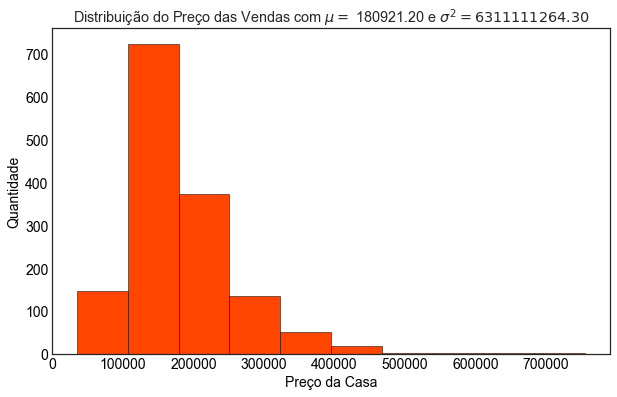

In [39]:
media_sales_price = treino["SalePrice"].mean()
var_sales_price = treino["SalePrice"].var()

plt.figure(figsize = [10, 6])
plt.hist(x = treino["SalePrice"], color = "orangered", edgecolor = "black")
plt.xlabel("Preço da Casa", fontsize = 14, color = "black")
plt.ylabel("Quantidade", fontsize = 14, color = "black")
plt.title("Distribuição do Preço das Vendas com $ \mu = $ %1.2f e $ \sigma^2 = %1.2f $" %(media_sales_price, var_sales_price))
plt.tick_params(axis = "x", labelsize = 14, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 14, labelcolor = "black")
plt.show()

In [31]:
?plt.yticks

Signature: plt.yticks(ticks=None, labels=None, **kwargs)
Docstring:
Get or set the current tick locations and labels of the y-axis.

Pass no arguments to return the current values without modifying them.

Parameters
----------
ticks : array-like, optional
    The list of xtick locations.  Passing an empty list removes all xticks.
labels : array-like, optional
    The labels to place at the given *ticks* locations.  This argument can
    only be passed if *ticks* is passed as well.
**kwargs
    `.Text` properties can be used to control the appearance of the labels.

Returns
-------
locs
    The list of ytick locations.
labels
    The list of ylabel `.Text` objects.

Notes
-----
Calling this function with no arguments (e.g. ``yticks()``) is the pyplot
equivalent of calling `~.Axes.get_yticks` and `~.Axes.get_yticklabels` on
the current axes.
Calling this function with arguments is the pyplot equivalent of calling
`~.Axes.set_yticks` and `~.Axes.set_yticklabels` on the current axes.

Exam